In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [38]:
s = ['Sky is blue', 'She has five apples', 'MIPT is the best']
dic = {}
for sent in s:
    words = sent.split()
    for w in words:
        if w not in dic:
            dic[w] = {}
        for w2 in words:
            dic[w][w2]=1

In [39]:
df = pd.DataFrame(dic)
df.fillna(0, inplace=True)
df

,MIPT,She,Sky,apples,best,blue,five,has,is,the
MIPT,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
She,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
Sky,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
apples,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
best,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
blue,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
five,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
has,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
is,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
the,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [40]:
pca = PCA()
res = pca.fit_transform(df)

In [41]:
import seaborn as sns

In [42]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

/Users/fogside/virtualenvs/python3_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


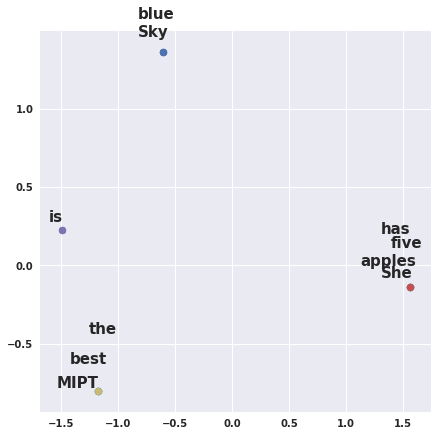

In [43]:
plt.figure(figsize=(7,7))
plt.scatter(res[:,0], res[:,1])
for i, label in enumerate(df.columns):
    x, y = res[i,0], res[i,1]
    plt.scatter(x, y)
    kek = {'has': (1, 50), 'is': (1, 5)}
    plt.annotate(label, xy=(x, y), xytext=kek.get(label,(1+i*2, 6*i)), textcoords='offset points',
                   ha='right', va='bottom', )